# 世界銀行（World Bank)からのデータ獲得

世界銀行は、189ヶ国各が加盟し、国の中央政府または同政府から債務保証を受けた機関に対し融資を行う国際機関です。  
貧困、経済、気候変動、保険、教育、ジェンダーなどの分野で、約8000の開発指標を無料公開しています。   
一覧は[こちら](https://data.worldbank.org/indicator)のサイトで提供されています。

たとえば"Economy & Growth"の"GDP per capita (current US$)"を見て見ましょう。  
リンクをたどると   

[https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart) 

というアドレスのサイトが開きます。アドレスの「indicator/」の後に続く「NY.GDP.PCAP.CD」がこのデータのインディケータです。   
pandas-datareaderでこのインディケータを指定すると、"GDP per capita (current US$)"のデータを取得することができます。

## GDP per capita (current US$)：一人当たりのGDP （ドル建て）を取得しよう

In [1]:
from pandas_datareader import wb

# 1990年から2017年までの中国（CN), 日本（JP)、米国（US)のデータを取ってきます
df = wb.download(indicator='NY.GDP.PCAP.CD', country=['CN', 'JP', 'US'],
                start=1990, end=2017)
# 出力してみましょう
print(df)

                    NY.GDP.PCAP.CD
country       year                
China         2017     8826.994096
              2016     8117.267465
              2015     8069.213024
              2014     7683.502613
              2013     7077.770765
              2012     6337.883323
              2011     5633.795717
              2010     4560.512586
              2009     3838.433972
              2008     3471.248054
              2007     2695.365917
              2006     2099.229435
              2005     1753.417829
              2004     1508.668098
              2003     1288.643252
              2002     1148.508290
              2001     1053.108243
              2000      959.372484
              1999      873.287062
              1998      828.580479
              1997      781.744164
              1996      709.413755
              1995      609.656679
              1994      473.492279
              1993      377.389839
              1992      366.460692
              1991  

1列のデータとしてダウンロードされるため、これを行列に変換します。

In [2]:
df2 = df.unstack(level=0)
df2.head()

NY.GDP.PCAP.CD                            
country          China         Japan United States
year                                              
1990        317.884673  25359.347020  23954.479355
1991        333.142145  28925.041576  24405.164815
1992        366.460692  31464.549046  25492.951652
1993        377.389839  35765.914089  26464.852512
1994        473.492279  39268.566869  27776.635528

折れ線グラフで表示してみましょう。

<IPython.core.display.Javascript object>


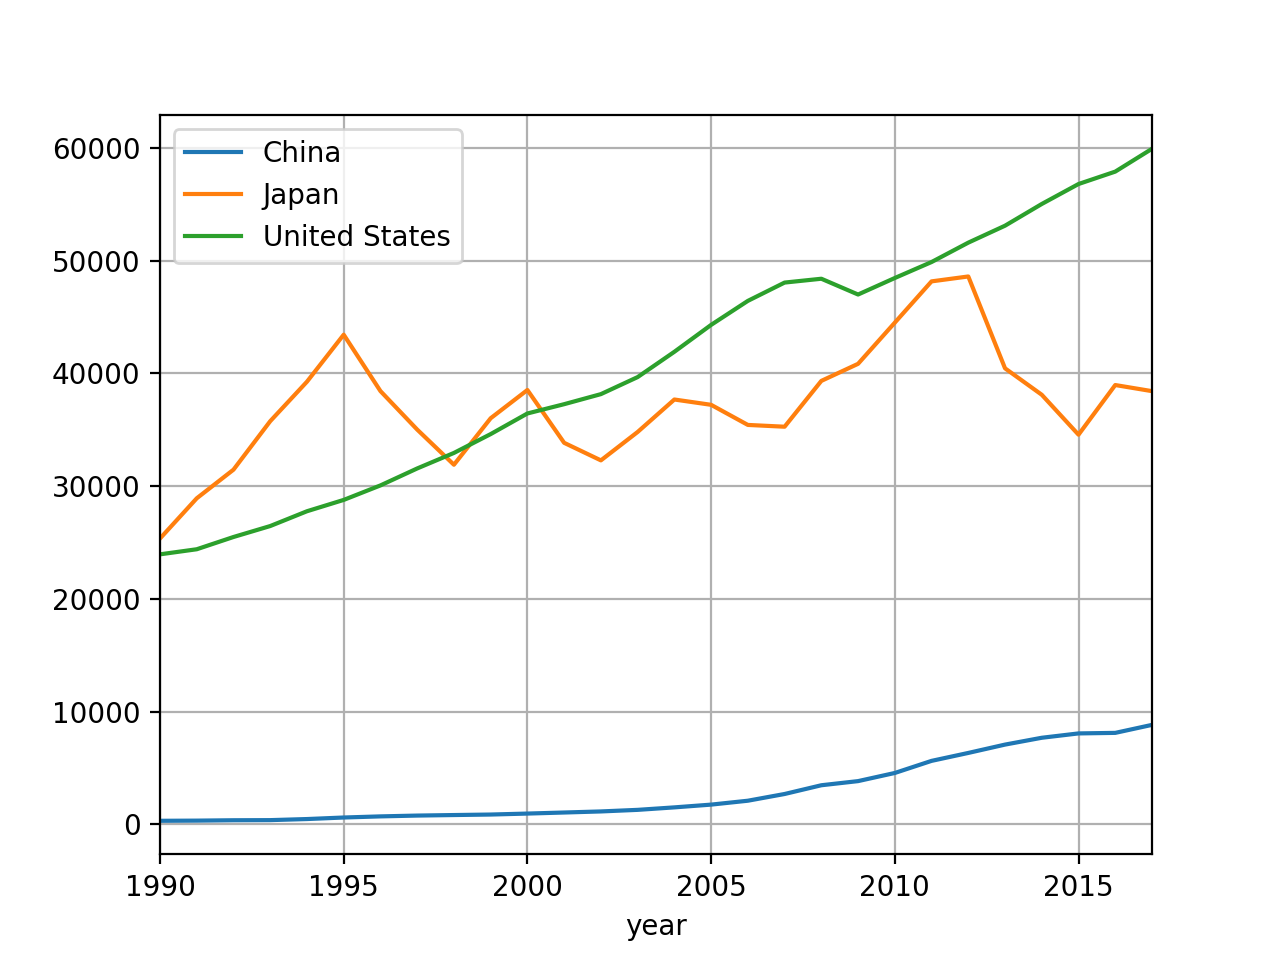

In [3]:
%matplotlib notebook

df2.columns = ['China', 'Japan', 'United States'] # 凡例を書き出し
df2.plot(grid=True) # グリッド線を描画

## Unemployment, total ：失業率（男女合計）
失業率のインディケータは「SL.UEM.TOTL.ZS」です。  
[https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?locations=JP-CN-US&view=chart](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?locations=JP-CN-US&view=chart)   
グラフを描画してみましょう。

<IPython.core.display.Javascript object>


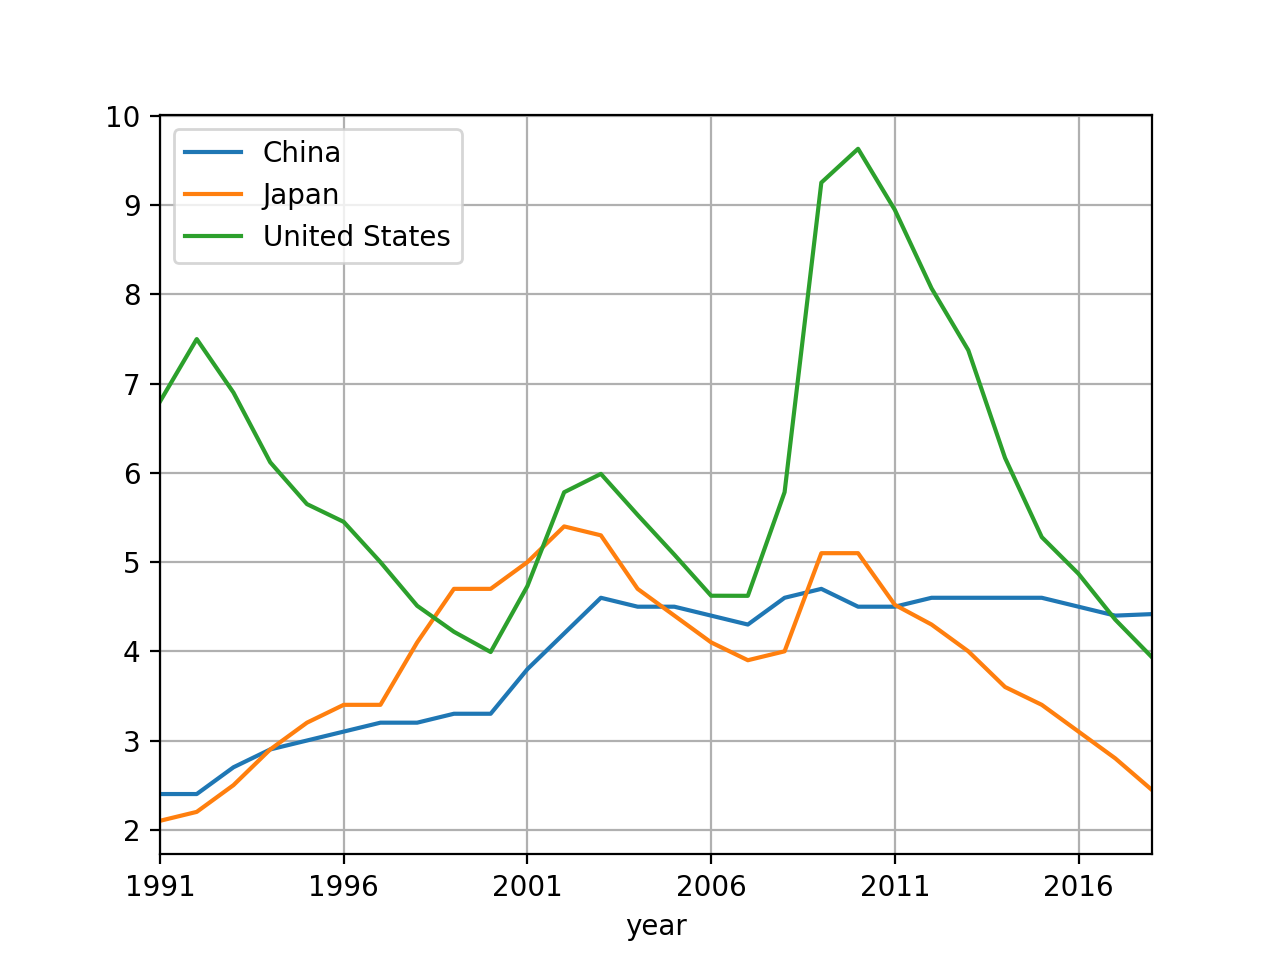

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pandas_datareader import wb

# 1991年から2018年までの中国（CN), 日本（JP)、米国（US)のデータを取ってきます
df = wb.download(indicator='SL.UEM.TOTL.ZS', country=['CN', 'JP', 'US'],
                start=1991, end=2018)
df2 = df.unstack(level=0)

df2.columns = ['China', 'Japan', 'United States']
df2.plot(grid=True)
plt.show()
plt.savefig('fig/WorldBank_SL.UEM.TOTL.ZS.png') # 図を画像として保存